In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from numba import jit

In [3]:
def downward_recursion(x):
    M = 100
    J = np.zeros(M+1)
    J[M] = 0
    J[M-1] = 1
    for l in range(M-1,0,-1):
        J[l-1] = (2*l+1)/x*J[l] - J[l+1]
    const = (np.sin(x)/x)/J[0]
    J = J*const
    return J

@jit(nopython=True)
def downward_recursion2(x):
    M = 120
    J = np.zeros(M+1)
    J[M] = 0
    J[M-1] = 1
    for l in range(M-1,0,-1):
        J[l-1] = (2*l+1)/x*J[l] - J[l+1]
    const = (np.sin(x)/x)/J[0]
    J = J*const
    return J

def upward_recursion(M,x):
    J = np.zeros(M+1)
    J[0] = np.sin(x)/x
    J[1] = np.sin(x)/x**2 - np.cos(x)/x
    for l in range(1,M):
        J[l+1] = (2*l+1)/x*J[l] - J[l-1]
    return J

def test_J_scipy(M,x):
    J =  [sp.spherical_jn(n,x) for n in range(M+1)]
    return J

print("test accuracy of downward recursion")
M = 120
x = 20
J_down = downward_recursion(x)
J_down2 = downward_recursion2(x)
J_up = upward_recursion(M,x)
J_scipy = test_J_scipy(M,x)
print("----|scipy - downward2|----"+"\n",np.isclose(J_down2,J_scipy))
#print("----|scipy - upwnward|----"+"\n",np.abs(J_up-J_scipy))
#print("----|downward - downward2|----"+"\n",np.abs(J_down-J_down2))
#print("----|scipy - upwnward|----"+"\n",np.isclose(J_up,J_scipy))

test accuracy of downward recursion
----|scipy - downward2|----
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [4]:
def derivative_J(x):
    J = downward_recursion2(x)
    dJ = np.zeros(len(J))
    for l in range(0,M):
        dJ[l] = l/x*J[l] - J[l+1]
    dJ[0] = -J[1] #from the second recursion relation in 1.20
    return dJ

def test_dJ_scipy(M,x):
    dJ = [sp.spherical_jn(n,x,derivative=True) for n in range(M+1)]
    return dJ
print("test accuracy of derivative of J")
M = 120
x = 6
dJ = derivative_J(x)
dJ_scipy = test_dJ_scipy(M,x)
print(dJ_scipy[0])
print("----|scipy - downward|----"+"\n",np.isclose(dJ,dJ_scipy))


test accuracy of derivative of J
0.16778992272503115
----|scipy - downward|----
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [11]:
@jit(nopython=True)
def J_lx(l,x):
    "not very efficient, but works"
    J = downward_recursion2(x)
    return J[l]

def dJ_lx(l,x):
    "not very efficient, but works"
    J = downward_recursion2(x)
    return l/x*J[l] - J[l+1]
    
@jit(nopython=True)   
def step(l,x):
    "a step for the newton raphson method"
    J = downward_recursion2(x)
    return J[l]/(l/x*J[l] - J[l+1])
    
print("test accuracy of J_lx and dJ_lx")
def test_J_lx_scipy(M,x):
    J = [sp.spherical_jn(n,x) for n in range(M+1)]
    return np.array(J)
def test_J_lx(M,x):
    J = [J_lx(n,x) for n in range(M+1)]
    return np.array(J)
M = 120
x = 2
print("----|scipy - downward|----"+"\n",np.abs(test_J_lx_scipy(M,x)-test_J_lx(M,x)))

test accuracy of J_lx and dJ_lx
----|scipy - downward|----
 [0.00000000e+000 0.00000000e+000 1.38777878e-016 4.16333634e-017
 8.67361738e-018 1.30104261e-018 5.42101086e-020 5.42101086e-020
 1.69406589e-021 2.11758237e-022 1.85288457e-022 1.65436123e-023
 3.10192730e-025 7.75481824e-026 1.61558713e-027 4.54383881e-028
 8.99301432e-029 1.28189897e-030 9.86076132e-032 7.70371978e-034
 6.62038418e-034 1.27893785e-035 1.05794492e-036 6.17134534e-038
 9.18354962e-040 2.86985925e-041 4.21510578e-042 1.68155816e-044
 9.28360233e-045 1.42319375e-046 3.16455342e-048 2.08475647e-049
 5.42905332e-051 3.34095589e-052 3.01795332e-054 2.29405235e-056
 3.42514761e-057 8.08991986e-059 2.21694919e-060 2.55240861e-062
 1.29139721e-063 1.30564057e-065 6.49111076e-067 8.11388845e-069
 4.98062349e-070 1.99507930e-071 1.37073267e-073 8.84343660e-075
 5.18170113e-077 3.44097341e-078 2.16115058e-080 8.40081399e-082
 3.60329031e-083 1.76947292e-085 5.65527567e-088 3.53454730e-089
 4.32613862e-090 5.75284390e-0

In [12]:
%timeit J = J_lx(2,x)

398 ns ± 5.52 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [13]:
from scipy.optimize import brentq
from scipy.optimize import newton

def newton_raphson(l,x_0,max_steps=5000):
    M = 100
    x = x_0
    for s in range(max_steps):
        x_old = x
        #x = x_old - J_lx(l,x)/dJ_lx(l,x)
        #x = x_old - sp.spherical_jn(l,x)/sp.spherical_jn(l,x,derivative=True)
        #x = x_old - downward_recursion2(x)[l]/derivative_J(x)[l]
        x = x_old - step(l,x_old)
        if np.abs(x-x_old) < 1e-10 and x < x_0:
            return x
        
    pass
    
def bessel_roots(l_max, n_roots,scipy=False):
    roots = np.zeros((l_max+1,n_roots+1))
    x_start = 1
    n = 0
    # for l = 0 we have J_0(x) = sin(x)/x so we know the roots are at x = n*pi
    #we know that roots for J_l(x) are between the two roots of J_{l-1}(x)
    roots[0] = np.arange(1,n_roots+2)*np.pi
    boundary_points = roots[0].copy()
    for l in range(1,l_max+1):
        for n in range(n_roots):
            x_start = (boundary_points[n]+boundary_points[n+1])/2 
            roots[l,n] = newton_raphson(l,x_start)

        roots[l,-1] = roots[l,-2] + np.pi  # we need to add a "fake" root to the end of the array to define the boundary this is not a real root but will not be returned
        boundary_points = roots[l].copy()
    return roots[:,:-1]

roots = bessel_roots(10,10)
print(roots)



[[ 3.14159265  6.28318531  9.42477796 12.56637061 15.70796327 18.84955592
  21.99114858 25.13274123 28.27433388 31.41592654]
 [ 4.49340946  7.72525184 10.90412166 14.06619391 17.22075527 20.37130296
  23.5194525  26.66605426 29.81159879 32.95638904]
 [ 5.7634592   9.09501133 12.32294097 15.51460301 18.68903636 21.85387422
  25.0128032  28.16782971 31.32014171 34.47048833]
 [ 6.987932   10.41711855 13.69802315 16.92362129 20.12180617 23.30424699
  26.47676366 29.64260454 32.80373239 35.9614058 ]
 [ 8.18256145 11.70490715 15.03966471 18.30125596 21.52541773 24.72756555
  27.9155762  31.09393321 34.26539009 37.43173677]
 [ 9.35581211 12.96653017 16.35470964 19.6531521  22.90455065 26.12775014
  29.33256258 32.52466129 35.70757695 38.88363096]
 [10.51283541 14.20739246 17.64797487 20.98346307 24.26276804 27.50786836
  30.73038073 33.9371083  37.13233172 40.31889251]
 [11.65703219 15.43128921 18.9229992  22.29534802 25.60285595 28.87037335
  32.11119624 35.33319418 38.54136485 41.73905287]


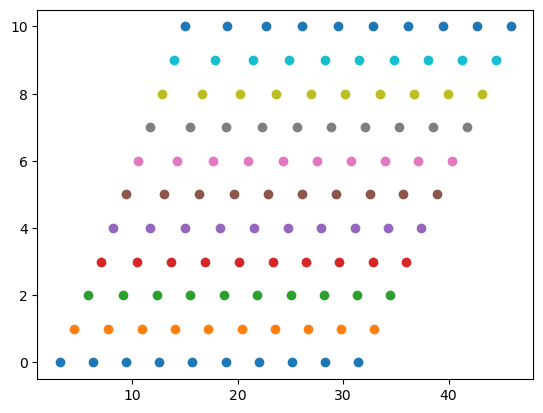

In [14]:
for l in range(len(roots)):
    plt.plot(roots[l],l*np.ones(len(roots[l])),'o')


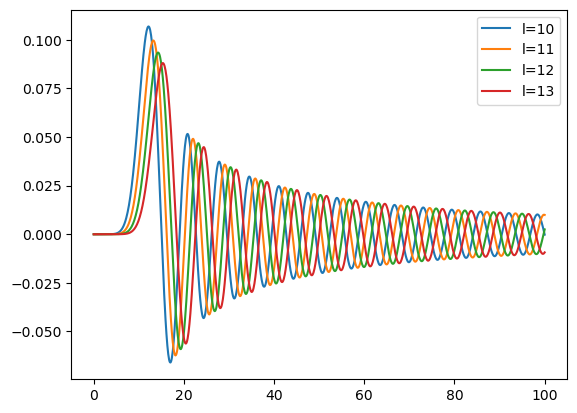

In [331]:
# plot 20 bessel functions
x = np.linspace(0,100,1000)
for l in [10,11,12,13]:
    plt.plot(x,sp.spherical_jn(l,x),label="l="+str(l))
    #plt.vlines(np.pi,-0.5,0.5,linestyles="dashed")
    #plt.hlines(0,0,10,linestyles="dashed")
    plt.legend()


In [1]:
from scipy import arange, pi, sqrt, zeros
from scipy.special import jv, jvp
from scipy.optimize import brentq
from sys import argv
from pylab import *

def Jn(r,n):
  return (sqrt(pi/(2*r))*jv(n+0.5,r))
def Jn_zeros(n,nt):
  zerosj = zeros((n+1, nt))
  zerosj[0] = arange(1,nt+1)*pi
  points = arange(1,nt+n+1)*pi
  racines = zeros(nt+n)
  for i in range(1,n+1):
    for j in range(nt+n-i):
      foo = brentq(Jn, points[j], points[j+1], args=(i,))
      racines[j] = foo
    points = racines
    zerosj[i][:nt] = racines[:nt]
  return (zerosj)


n = 2
nt = 3

dr = 0.01
eps = dr/1000

jnz = Jn_zeros(n,nt)[n]
print(jnz)


[ 5.7634592   9.09501133 12.32294097]
